<a href="https://colab.research.google.com/github/ashleighperez/DS3010_A/blob/main/Case_Studies/CaseStudy1_NewsAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study 1 : Collecting Data from NewsAPI



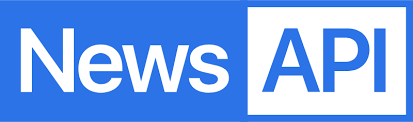

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Ashleigh Perez
    
    Srisaranya Pujari
    
    Diana Binney

**Suggested Readings:**
* The NewsAPI documentation: https://newsapi.org/docs
* The Python library for NewsAPI: https://newsapi.org/docs/client-libraries/python
* The Pyhon notebook I used in class 3
  * In fact, it is intentional that many of these questions can be answered directly from there (except for question 4)!
* The idea is to ease you into the case studies :-)

**Don't forget!**
* You will need to install the newsapi-python library to access NewsAPI
 * pip install newsapi-python
* You will need to get an API key from NewsAPI to access the data
  * https://newsapi.org/register


** NOTE **
* **Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost**.

# Problem 1 (20 points): Sampling NewsAPI data a certain topic

* Select a topic that you are interested in, for example, "WPI" or "Lady Gaga"
* Use the NewsAPI to sample a collection of news articles about this topic. (It would be recommended that the number of articles should be larger than 200, but smaller than 100,000.
* Store the articles you downloaded into file on Google Drive (txt file or json file)

In [ ]:
! pip install newsapi-python

In [2]:
from newsapi import NewsApiClient
import json

# See https://newsapi.org/docs for more information
# on NewsAPI implementation.

API_KEY = '33a842ee09bc496cbe65f5b3ae90c200'

newsapi = NewsApiClient(api_key=API_KEY)
# print(newsapi)

### Report some statistics about the news articles you collected

* The topic of interest: space


* The total number of news articles collected:  20

In [89]:
# Search for top headlines in Space Exploration
headlines = newsapi.get_everything(q='space',
                                       #sources='bbc-news,the-verge',
                                       #domains='bbc.co.uk,techcrunch.com',
                                       from_param='2023-10-31',
                                       to='2023-11-10',
                                       language='en',
                                       sort_by='relevancy',
                                       #page=2
                                       )

*-----------------------

In [95]:
# save search (LOCALLY)
import json
data = json.dumps(headlines, indent=1)

file = open('spaceSearch.json','w')
file.write(data)
file.close()
file = open('spaceSearch.json','r') # overwriting closed write-only file as read-only

# saving json to 'd' and printing to ensure articles where saved correctly
d = json.loads(file.read())
print(len(d['articles']), "total articles")
print() #print statement added for readability/spacing

#printing out article auth, title, and desc
for article in d['articles']:
  print(f"author: {article['author']}")
  print(f"title: {article['title']}")
  print(f"description: {article['description']}")
  print()

100 total articles

author: Ramin Skibba
title: The Euclid Space Telescope’s Spectacular First Photos of Distant and Hidden Galaxies
description: Images from the European Space Agency’s newest telescope show the power of instruments that will create 3D surveys of a third of the sky, covering 10 billion years of cosmic history.

author: Passant Rabie
title: Astronaut Tool Bag Becomes Unexpected Satellite After ISS Spacewalk Slip-Up
description: In space, misplacing a bag of tools is hard to recover from. A tiny mishap during a recent spacewalk outside the International Space Station (ISS) has led to a new object in the night sky, with a tool bag now orbiting Earth ahead of the space station, tempora…

author: Ramin Skibba
title: How a Scientist and Cartoonist Envision Living on the Moon and Mars
description: In A City on Mars, Kelly and Zach Weinersmith imagine what it would really be like to live in space: thrilling and absolutely grueling.

author: Isaac Schultz
title: Skeletal Hand-L

In [ ]:
#save search (COLAB) /// NOT TESTED
data= json.dumps(headlines, indent=1)
file = open('gdrive/MyDrive/ds3010_2023/foo.txt','w')
file.write(data)
file.close()
file = open('spaceSearch.txt','r') # overwriting closed write-only file as read-only

# saving json to 'd' and printing to ensure articles where saved correctly
d = json.loads(file.read())
print(len(d['articles']), "total articles")
print() #print statement added for readability/spacing

# printing the rest
for article in d['articles']:
  print(f"author: {article['author']}")
  print(f"title: {article['title']}")
  print(f"description: {article['description']}")

# Problem 2 (20 points): Analyzing News Articles with Frequency Analysis

**1. Word Count:**
* Use the news articles you collected in Problem 1, and compute the frequencies of the words being used in these articles.
* Note, you can use various parts of the articles (e.g. the tite, the description, the content) to compute the word frequencies.
  * Which is most useful?
* Plot a table of the top 30 words with their counts

In [97]:
from prettytable import PrettyTable

# Example Table
example_table = PrettyTable() # Initialize Table
example_table.field_names = ["Course Name", "Department"] # Declare column names

# Add each row
example_table.add_row(["DS3010", "Data Science"])
example_table.add_row(["CS4120", "Computer Science"])
example_table.add_row(["MIS 4084", "Business"])

# Display table
print(example_table)

+-------------+------------------+
| Course Name |    Department    |
+-------------+------------------+
|    DS3010   |   Data Science   |
|    CS4120   | Computer Science |
|   MIS 4084  |     Business     |
+-------------+------------------+


In [121]:
# save lists of authors sources descriptions and content
authors = [ article['author'] for article in d['articles'] ]
sources = [ article['source']['name'] for article in d['articles'] ]
descriptions = [ article['description'] for article in d['articles'] ]
content = [ article['content'] for article in d['articles'] ]

# Compute a collection of all words from all articles
words = [ w
          for d in descriptions
              for w in d.split() ]

# create a counter for word count
from collections import Counter
for item in [authors, sources, words]:
    c = Counter(item)

# Creating table
for label, f in (('Word', words), ('Author', authors), ('Source', sources)):
    pt = PrettyTable(field_names=[label, 'Count']) # intitalizing table
    c = Counter(f) # accessing counter 

    [ pt.add_row(kv) for kv in c.most_common()[:10] ] # getting common words
    
    #pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

    ## NEEDS TO BE SHORTENED TO WORDS ONLY

# for l in words:
#     pt = PrettyTable(field_names = ['Word', 'Count']) # intitalizing table
#     c = Counter(l) # accessing counter 

#     [ pt.add_row(kv) for kv in c.most_common()[:10] ] # getting common words
    
#     #pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
#     print(pt)

+-------+-------+
|  Word | Count |
+-------+-------+
|  the  |  150  |
|   a   |   92  |
|   to  |   85  |
|   of  |   83  |
|  and  |   73  |
|   in  |   49  |
|  for  |   43  |
|   is  |   36  |
| space |   29  |
|   on  |   29  |
+-------+-------+
+------------------+-------+
|      Author      | Count |
+------------------+-------+
|  Passant Rabie   |   6   |
|   Trevor Mogg    |   3   |
|   Ramin Skibba   |   2   |
|   Becca Lewis    |   2   |
|  Justin Carter   |   2   |
|  Sam Rutherford  |   2   |
|  Stephen Clark   |   2   |
| Lindsey Ellefson |   2   |
|  Joe Rossignol   |   2   |
|   Donald Papp    |   2   |
+------------------+-------+
+------------------+-------+
|      Source      | Count |
+------------------+-------+
| Business Insider |   13  |
|   Gizmodo.com    |   12  |
|  Lifehacker.com  |   10  |
|     Engadget     |   8   |
|      Wired       |   7   |
|  Digital Trends  |   6   |
|   Boing Boing    |   5   |
|     Hackaday     |   5   |
|    MacRumors     |   

**2. Find the most popular news sources and authors in your articles**

* Please provide a table of the top 10 authors and sources that are the most popular among your collection.


In [126]:

# Creating table
for label, f in (('Author', authors), ('Source', sources)):
    pt = PrettyTable(field_names=[label, 'Count']) # intitalizing table
    c = Counter(f) # accessing counter 

    [ pt.add_row(kv) for kv in c.most_common()[:10] ] # getting common words
    
    #pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)


+------------------+-------+
|      Author      | Count |
+------------------+-------+
|  Passant Rabie   |   6   |
|   Trevor Mogg    |   3   |
|   Ramin Skibba   |   2   |
|   Becca Lewis    |   2   |
|  Justin Carter   |   2   |
|  Sam Rutherford  |   2   |
|  Stephen Clark   |   2   |
| Lindsey Ellefson |   2   |
|  Joe Rossignol   |   2   |
|   Donald Papp    |   2   |
+------------------+-------+
+------------------+-------+
|      Source      | Count |
+------------------+-------+
| Business Insider |   13  |
|   Gizmodo.com    |   12  |
|  Lifehacker.com  |   10  |
|     Engadget     |   8   |
|      Wired       |   7   |
|  Digital Trends  |   6   |
|   Boing Boing    |   5   |
|     Hackaday     |   5   |
|    MacRumors     |   4   |
|    The Verge     |   3   |
+------------------+-------+


**3. What is the lexical diversity in your descriptions and contents**

* For two popular authors or two popular sources, please compare the lexical diversity of their descriptions and contents.  
Which one is more diverse?  
  * Open ended questions: Does this make sense?  Why or why not? What might lexical diversity tell us about the author or source?

In [154]:
# Function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens)

ld = 0
sum = 0

for article in d['articles']:
    if article['author'] == 'Passant Rabie':
        ld += lexical_diversity(article['content']) + lexical_diversity(article['description'])
        sum += 1

#Trevor Mogg is more diverse because a score of 1
print("Passant Rabie Lexical Diversity:", ld/sum)

ld = 0
sum = 0

for article in d['articles']:
    if article['author'] == 'Trevor Mogg':
        ld += lexical_diversity(article['content']) + lexical_diversity(article['description'])
        sum += 1

print("Trevor Mogg Lexical Diversity:", ld/sum)

Passant Rabie Lexical Diversity: 0.34781644943164647
Trevor Mogg Lexical Diversity: 0.422685070702765




# Problem 3 (20 points): Image processing


* For each news article, download the image associated with it (using the urlToImage field).
* Do these images tell you anything about the news articles?  If so, what?

In [158]:
from IPython.display import Image
image_urls = {}

i=0

# for every artivcle, we try to save if there is one
for article in d['articles']:
  i += 1
  try:
    image_url = article['urlToImage']
    article = article
    image = Image(url=image_url)
    #display(image) #
    image_urls[i]=(image_url) 
  except ValueError:
    print('no image')

* Let's automate the process!  Use Hugging Face's transformers library to download a pre-trained image segmentation model.
  * See my notebook from class 3 for an example of how to do this.
* Open ended question: Collect statistics on what appears in the images for your news articles? What does this tell you?

In [10]:
# imports
#! pip install -q datasets transformers evaluate timm albumentations
#! pip install ipywidgets

from huggingface_hub import notebook_login
notebook_login()


In [14]:
from transformers import pipeline
import requests
from PIL import Image, ImageDraw

# Pick an image
image_url = image_urls[1]

image = Image.open(requests.get(image_url, stream=True).raw)

obj_detector = pipeline("object-detection")

results = obj_detector(image)

NameError: name 'image_urls' is not defined



# Problem 4 (20 points): Business question

Run some additional experiments with your data to gain familiarity with the NewsAPI.

* Come up with a business question that NewsAPI data could help answer.
* Decribe the business case.
* How could NewsAPI data help a company decide how to spend its resources.

In [ ]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary






# Done

All set!

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 15 minutes' talk) to present about the case study . ALL TEAMS WILL PRESENT THEIR WORK!

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What data you collected?
    * Why this topic is interesting or important to you? (Motivations)
    * How did you analyse the data?
    * What did you find in the data?

     (please include figures or tables in the report, but no source code)

Please compress all the files in a zipped file.


** How to submit: **

        Please submit a single zip file with all the materials through the class canvas site.
        
** Note: Each team just needs to submits one submission **

# Grading Criteria:

** Totoal Points: 100 **


---------------------------------------------------------------------------
** Notebook results:  **
    Points: 80


    -----------------------------------
    Qestion 1:
    Points: 20
    -----------------------------------
    
    (1) Select a topic that you are interested in.
    Points: 6
    
    (2) Use the NewsAPI to sample a collection of news articles about this topic. (It would be recommended that the number of articles should be larger than 200, but smaller than 100,000. Please check whether the total number of tweets collected is larger than 200.
    Points: 10
    
    
    (3) Store the articles you downloaded into a file on Google Drive (txt file or json file)
    Points: 4
    
    
    -----------------------------------
    Qestion 2:
    Points: 20
    -----------------------------------
    
    1. Word Count

    (1) Use the news articles you collected in Problem 1, and compute the frequencies of the words being used in these articles.
    Points: 5

    (2) Plot a table of the top 30 words with their counts
    Points: 5
    
    2. Please provide a table of the top 10 authors and sources that are the most popular among your collection.
    Points: 5
    
    3. For two popular authors or two popular sources, please compare the lexical diversity of their descriptions and contents.
    Points: 5
      
    -----------------------------------
    Qestion 3:
    Points: 20
    -----------------------------------
    
    (1) For each news article, download the image associated with it (using the urlToImage field).
    Points: 10

    (2) Use Hugging Face's transformers library to download a pre-trained image segmentation model.
    Points: 10
  
    -----------------------------------
    Qestion 4:  Business question
    Points: 20
    -----------------------------------
        Novelty: 10
        Interestingness: 10
    -----------------------------------
    Run some additional experiments with your data to gain familiarity with the NewsAPI.  Come up with a business question and describe how NewsAPI data can help you answer that question.



---------------------------------------------------------------------------
**Slides (for presentation): Story-telling**
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5

2. Communicating Results (figure/table)
    Points: 10

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5

